In [1]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from time import sleep

In [2]:
# Import data
df = pd.read_csv("outputs\\df_data.csv")
df.head()

,type,geometry.type,geometry.coordinates,properties.values,properties.unit.state.area,properties.unit.state.year_of_planting,properties.unit.state.variety,properties.unit.metadata,properties.unit.id,properties.unit.full_name,...,2020-02-15_array,2020-02-15,2020-03-11_array,2020-03-11,2020-04-15_array,2020-04-15,2020-04-20_array,2020-04-20,Kg/Ha,Kg/Ha_date
0,Feature,Polygon,"[[[-75.6396578867764, -14.199701335951724], [-...","[{'value': 3581.158766439885, 'variety': {}, '...",6.530601,['2019'],"['hass, fuerte, zutano']","[{'level_name': 'empresa', 'name': 'agricola c...",90214,lote AGRICOLA CHAPI.DON ERNESTO.PAL-1.36,...,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.585075,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.587418,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.623925,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.649108,3581.158766,2019-09-19
1,Feature,Polygon,"[[[-75.64231663022875, -14.20062882414364], [-...","[{'value': 4037.3751791811173, 'variety': {}, ...",6.555069,['2019'],"['hass, fuerte, zutano']","[{'level_name': 'empresa', 'name': 'agricola c...",90215,lote AGRICOLA CHAPI.DON ERNESTO.PAL-1.37,...,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.587701,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.585747,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.622790,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.650104,4037.375179,2019-09-19
2,Feature,Polygon,"[[[-75.63898926117189, -14.201527268326426], [...","[{'value': 4658.420440484501, 'variety': {}, '...",6.533254,['2019'],"['hass, fuerte, zutano']","[{'level_name': 'empresa', 'name': 'agricola c...",90216,lote AGRICOLA CHAPI.DON ERNESTO.PAL-1.42,...,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.593903,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.600877,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.628707,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.660342,4658.420440,2019-09-19
3,Feature,Polygon,"[[[-75.64164955317383, -14.202454024468352], [...","[{'value': 4196.272165747293, 'variety': {}, '...",6.551013,['2019'],"['hass, fuerte, zutano']","[{'level_name': 'empresa', 'name': 'agricola c...",90217,lote AGRICOLA CHAPI.DON ERNESTO.PAL-1.43,...,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.595797,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.601193,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.622388,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.655480,4196.272166,2019-09-19
4,Feature,Polygon,"[[[-75.64164955317383, -14.202454024468352], [...","[{'value': 4744.580970357842, 'variety': {}, '...",6.534646,['2019'],"['hass, fuerte, zutano']","[{'level_name': 'empresa', 'name': 'agricola c...",90218,lote AGRICOLA CHAPI.DON ERNESTO.PAL-1.48,...,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.603345,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.614018,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.634250,[[1. 1. 1. ... 1. 1. 1.]\n [1. 1. 1. ... 1. 1....,0.672965,4744.580970,2019-09-19


# Correlation analysis

In [3]:
#Get general results per lot
NDVI_cols = [col for col in df.columns if ('-' in col) & ("array" not in col)]
NDVI_cols_2019 = [col for col in NDVI_cols if ('2019' in col)]
NDVI_cols_2019_09 = [col for col in NDVI_cols_2019 if ('09-' in col)]
NDVI_cols_2019_before_09 = [col for col in NDVI_cols_2019 if ('09-' not in col) & ('10-' not in col) & ('11-' not in col) & ('12-' not in col)]

def get_stats(df, cols, cols_name):
    df["average_" + cols_name] = df[cols].mean(axis = 1)
    df["std_" + cols_name] = df[cols].std(axis = 1)
    df["not_null_" + cols_name] = df[cols].count(axis = 1)
    df["min_" + cols_name] = df[cols].min(axis = 1)
    df["first_quantile_" + cols_name] = df[cols].quantile(0.25, axis = 1)
    df["second_quantile_" + cols_name] = df[cols].quantile(0.5, axis = 1)
    df["third_quantile_" + cols_name] = df[cols].quantile(0.75, axis = 1)
    df["max_" + cols_name] = df[cols].max(axis = 1)
    
    return(df)
    
    
for cols in [[NDVI_cols, "NDVI_cols"], [NDVI_cols_2019, "NDVI_cols_2019"], [NDVI_cols_2019_09, "NDVI_cols_2019_09"], [NDVI_cols_2019_before_09, "NDVI_cols_2019_before_09"]]:
    get_stats(df, cols[0], cols[1])

df.head()


,type,geometry.type,geometry.coordinates,properties.values,properties.unit.state.area,properties.unit.state.year_of_planting,properties.unit.state.variety,properties.unit.metadata,properties.unit.id,properties.unit.full_name,...,third_quantile_NDVI_cols_2019_09,max_NDVI_cols_2019_09,average_NDVI_cols_2019_before_09,std_NDVI_cols_2019_before_09,not_null_NDVI_cols_2019_before_09,min_NDVI_cols_2019_before_09,first_quantile_NDVI_cols_2019_before_09,second_quantile_NDVI_cols_2019_before_09,third_quantile_NDVI_cols_2019_before_09,max_NDVI_cols_2019_before_09
0,Feature,Polygon,"[[[-75.6396578867764, -14.199701335951724], [-...","[{'value': 3581.158766439885, 'variety': {}, '...",6.530601,['2019'],"['hass, fuerte, zutano']","[{'level_name': 'empresa', 'name': 'agricola c...",90214,lote AGRICOLA CHAPI.DON ERNESTO.PAL-1.36,...,0.502879,0.522066,0.553531,0.042193,21,0.471451,0.518513,0.554990,0.581761,0.611917
1,Feature,Polygon,"[[[-75.64231663022875, -14.20062882414364], [-...","[{'value': 4037.3751791811173, 'variety': {}, ...",6.555069,['2019'],"['hass, fuerte, zutano']","[{'level_name': 'empresa', 'name': 'agricola c...",90215,lote AGRICOLA CHAPI.DON ERNESTO.PAL-1.37,...,0.511076,0.528146,0.552537,0.041856,21,0.470786,0.516079,0.554301,0.580506,0.612492
2,Feature,Polygon,"[[[-75.63898926117189, -14.201527268326426], [...","[{'value': 4658.420440484501, 'variety': {}, '...",6.533254,['2019'],"['hass, fuerte, zutano']","[{'level_name': 'empresa', 'name': 'agricola c...",90216,lote AGRICOLA CHAPI.DON ERNESTO.PAL-1.42,...,0.519074,0.540435,0.571544,0.042075,21,0.489557,0.537711,0.579759,0.601865,0.629699
3,Feature,Polygon,"[[[-75.64164955317383, -14.202454024468352], [...","[{'value': 4196.272165747293, 'variety': {}, '...",6.551013,['2019'],"['hass, fuerte, zutano']","[{'level_name': 'empresa', 'name': 'agricola c...",90217,lote AGRICOLA CHAPI.DON ERNESTO.PAL-1.43,...,0.519640,0.534169,0.563879,0.040833,21,0.483673,0.533012,0.570997,0.590695,0.622998
4,Feature,Polygon,"[[[-75.64164955317383, -14.202454024468352], [...","[{'value': 4744.580970357842, 'variety': {}, '...",6.534646,['2019'],"['hass, fuerte, zutano']","[{'level_name': 'empresa', 'name': 'agricola c...",90218,lote AGRICOLA CHAPI.DON ERNESTO.PAL-1.48,...,0.522225,0.555315,0.577583,0.043442,21,0.492963,0.547159,0.589550,0.608519,0.638184


,std_NDVI_cols_2019,std_NDVI_cols_2019_before_09,max_NDVI_cols_2019,third_quantile_NDVI_cols_2019_before_09,max_NDVI_cols_2019_before_09,max_NDVI_cols,third_quantile_NDVI_cols_2019,average_NDVI_cols_2019_before_09,second_quantile_NDVI_cols_2019_before_09,second_quantile_NDVI_cols_2019,...,second_quantile_NDVI_cols_2019_09,first_quantile_NDVI_cols_2019_09,std_NDVI_cols_2019_09,first_quantile_NDVI_cols,std_NDVI_cols,min_NDVI_cols,not_null_NDVI_cols,not_null_NDVI_cols_2019,not_null_NDVI_cols_2019_09,not_null_NDVI_cols_2019_before_09
Kg/Ha,0.89988,0.831545,0.828841,0.819209,0.813873,0.813764,0.812578,0.80885,0.804861,0.803752,...,0.736661,0.735791,0.728324,0.719537,0.714196,0.690111,0.685219,NaN,NaN,NaN


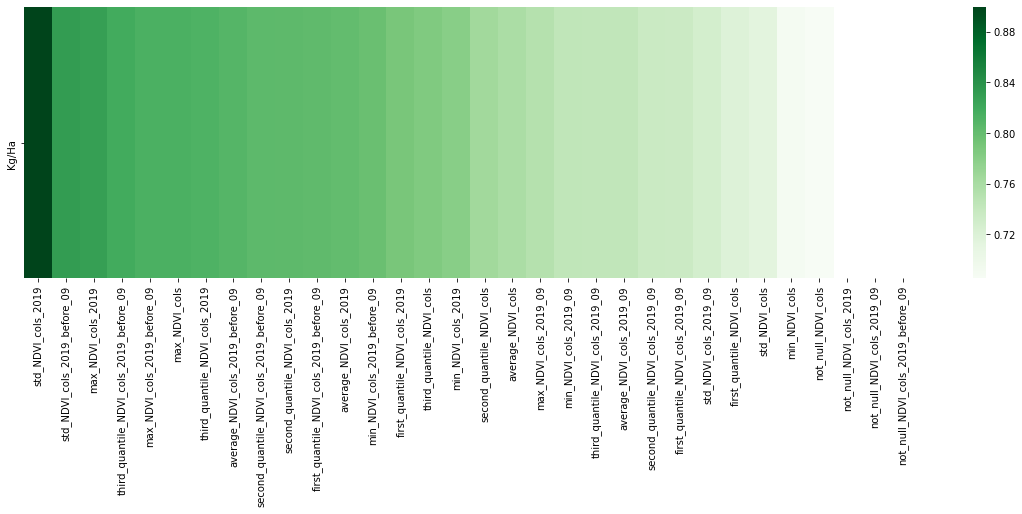

In [4]:
#Get correlations
not_corr_columns = NDVI_cols + ["properties.unit.state.area", "properties.unit.id"]

df_corr = df.drop(not_corr_columns, axis = 1).corr()
df_corr = df_corr.loc[df_corr.index == 'Kg/Ha']
df_corr = df_corr.drop("Kg/Ha", axis = 1)
df_corr = df_corr.sort_values("Kg/Ha", axis = 1, ascending = False)
df_corr.to_excel("outputs\\df_corr.xlsx")

fig, ax = plt.subplots(figsize=(20,5))  
corr_heatmap=sns.heatmap(df_corr,cmap='Greens')
corr_heatmap.figure.savefig("outputs\\correlation_analysis.png",bbox_inches="tight", ax = ax)

df_corr

# Conclusiones de correlación

- Los agricultores tienen razón:

Las variables estadísticas de NDVI muestran correlaciones mayores a 0.685 con los kilogramos producidos por hectárea. Con esta correlación agregada a la experiencia y la base teórica se puede afirmar que existe una relación entre el NDVI y el rendimiento del cultivo.

- La desviación estándar y los valores altos de NDVI son los indicadores más importantes para la productividad en fechas cercanas a la medición de productividad:

Es importante entender cómo interpretar las variables con mayor correlación.
Hipótesis: Esta alta correlación se da porque el NDVI se encuentra en el nivel más alto en momentos cercanos de la medición. Esto explicaría la correlación con el valor máximo, el valor del tercer cuartil y con las desviación estándar, ya que el NDVI se encontraría en aumento en esas fechas lo que arrojaría una alta desviación.

- El valor máximo es más importante que el valor promedio:

Para todos los grupos de variables estadísticas (general, 2019, 2019 antes de septiembre y septiembre de 2019) la correlación entre la producción y el valor máximo del NDVI es mayor que el de la producción y el promedio. Esto indica que los cultivos con valor del NDVI más alto son los que presentan cultivos con mayor producción.

- Los valores del NDVI en rangos de tiempo largos explican mejor la productividad que en rangos de tiempo cortos:

Como vemos las variables estadísticas relacionadas a septiembre de 2019 presentan las correlaciones más bajas frente a la productividad. Mientras que las variables estadísticas con mayor correlación son las relacionadas al 2019 y 2019 hasta antes de septiembre. Es importante encontrar el rango de tiempo adecuado si se busca hacer una regresión lineal.

# Visualizing time series

  Kg/Ha_level        Kg/Ha
0    Low_prod  1152.994972
1    Med_prod  4252.770622
2   High_prod  5356.548006


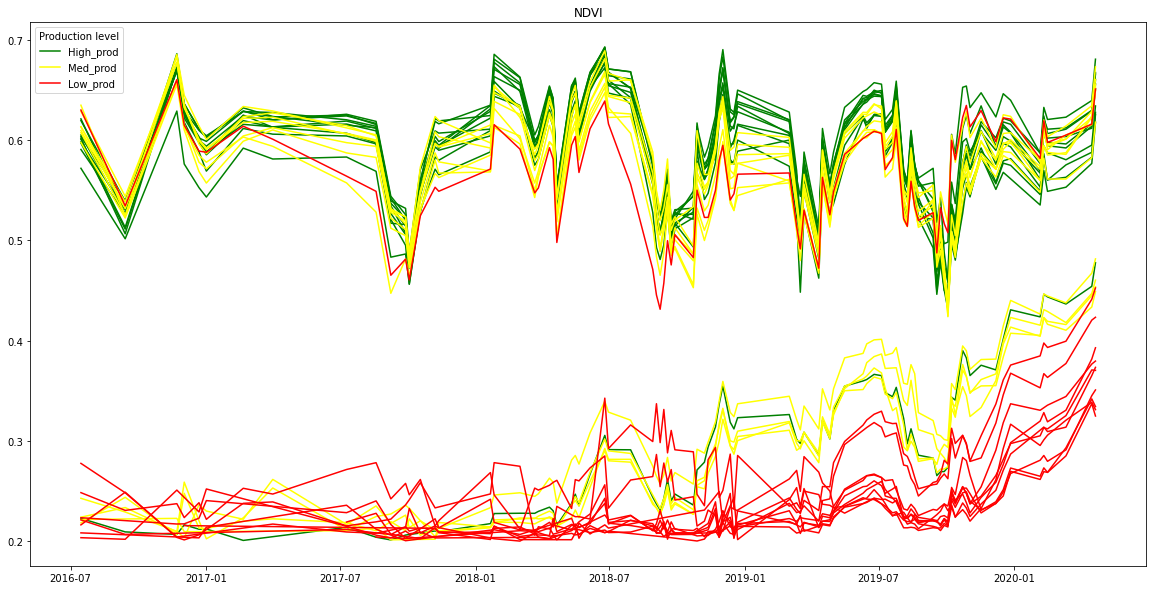

In [5]:
#Get High, Med, Low production IDs
df = df.sort_values("Kg/Ha", ascending = False)
df["Kg/Ha_level"] = pd.qcut(df["Kg/Ha"], 3, labels=["Low_prod", "Med_prod", "High_prod"])

print(df[["Kg/Ha_level", "Kg/Ha"]].groupby("Kg/Ha_level", as_index = False).mean())

High_ids = df.loc[df["Kg/Ha_level"] == "High_prod"]["properties.unit.id"]
Med_ids = df.loc[df["Kg/Ha_level"] == "Med_prod"]["properties.unit.id"]
Low_ids = df.loc[df["Kg/Ha_level"] == "Low_prod"]["properties.unit.id"]

#Time series data format
df_time_series = df.set_index("properties.unit.id")
df_time_series = df_time_series[NDVI_cols].transpose()
df_time_series.index = pd.to_datetime(df_time_series.index)

#Color for each production level
color_dict = {
                "High_prod" : "green",
                "Med_prod" : "yellow",
                "Low_prod" : "red"
             }

fig, ax = plt.subplots(figsize=(20,10))  

high = 0
med = 0
low = 0

#Draw all lots NDVIs per date, colored by production level
for col in df_time_series.columns:
    
    level = df.loc[df["properties.unit.id"] == col]["Kg/Ha_level"].values[0]
    color = color_dict[level]
    if level == "High_prod":
        if high == 0:
            high = 1
            time_graph = sns.lineplot(data = df_time_series[col], dashes = False, label = level, color = color)
        else: time_graph = sns.lineplot(data = df_time_series[col], dashes = False, color = color)
    elif level == "Med_prod":
        if med == 0:
            med = 1
            time_graph = sns.lineplot(data = df_time_series[col], dashes = False, label = level, color = color)
        else: time_graph = sns.lineplot(data = df_time_series[col], dashes = False, color = color)
    else:
        if low == 0:
            low = 1
            time_graph = sns.lineplot(data = df_time_series[col], dashes = False, label = level, color = color)
        else: time_graph = sns.lineplot(data = df_time_series[col], dashes = False, color = color)
            
    

time_graph.set_title("NDVI")
time_graph.legend(title = "Production level", loc='upper left')
time_graph.figure.savefig("outputs\\time_series_analysis.png",bbox_inches="tight", ax = ax)
plt.show()
plt.close()


El gráfico refuerza la correlación entre el nivel de NDVI y el nivel de producción de los lotes

Se observa una diferencia marcada entre dos grupos de series temporales.

Agruparemos las series temporales según su promedio. El corte será en 0.4

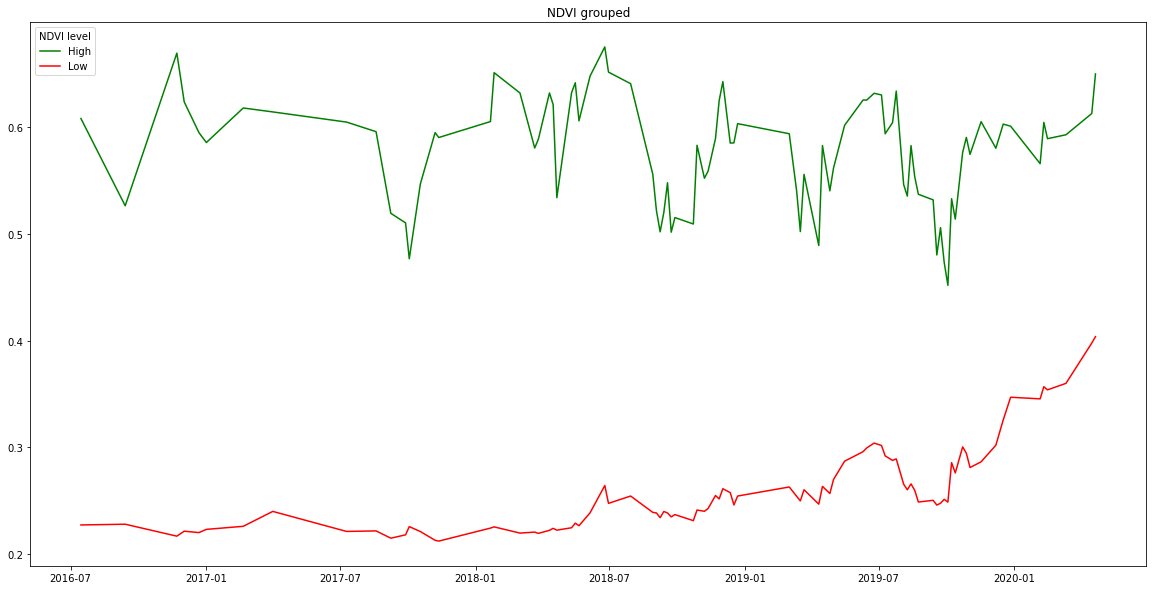

In [6]:
#Draw NDVIs per date, lots grouped by NDVI level

fig, ax = plt.subplots(figsize=(20,10))  

High_ids = df.loc[df["average_NDVI_cols"] >0.4]["properties.unit.id"]
Low_ids = df.loc[df["average_NDVI_cols"] <= 0.4]["properties.unit.id"]

df_time_series["High"] = df_time_series[High_ids].mean(axis = 1)
df_time_series["Low"] = df_time_series[Low_ids].mean(axis = 1)

time_grouped_graph = sns.lineplot(data = df_time_series["High"], dashes = False, label = "High", color = "green")
time_grouped_graph = sns.lineplot(data = df_time_series["Low"], dashes = False, label = "Low", color = "red")

time_grouped_graph.set_title("NDVI grouped")
time_grouped_graph.legend(title = "NDVI level", loc='upper left')
time_grouped_graph.figure.savefig("outputs\\time_series_grouped_analysis.png",bbox_inches="tight", ax = ax)

plt.show()
plt.close()

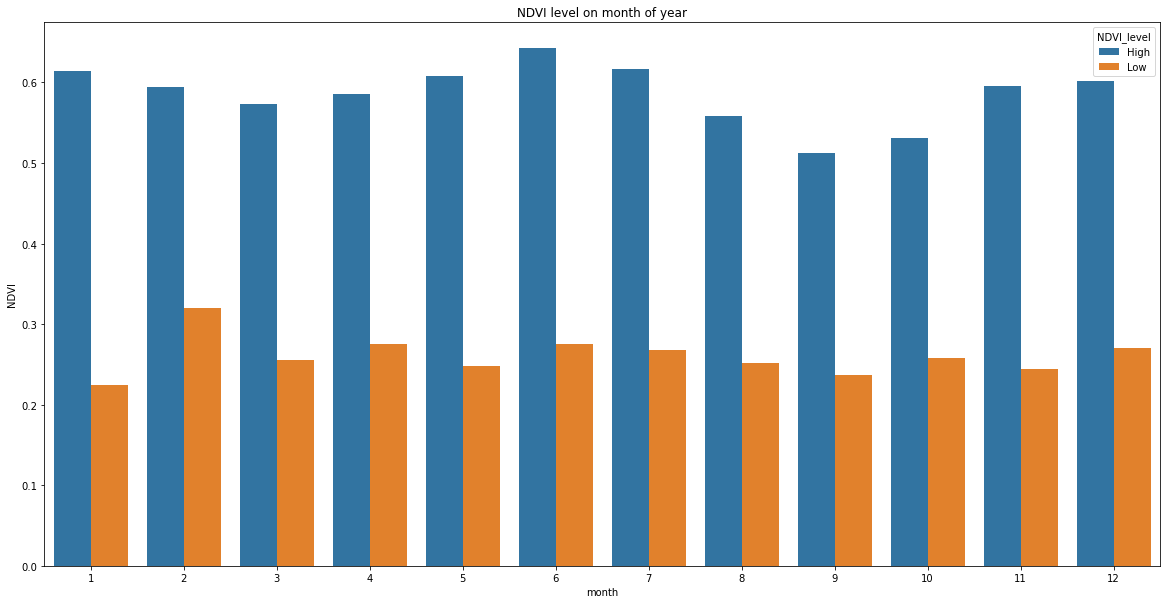

In [7]:
#Check on month of year bevaiour
df_time_series["month"] = df_time_series.index.month
df_month_of_year = df_time_series[["High", "Low", "month"]].groupby("month", as_index = False).mean()
df_month_of_year = df_month_of_year.melt(id_vars='month').rename(columns = {"value" : "NDVI", "properties.unit.id" : "NDVI_level"})
fig, ax = plt.subplots(figsize=(20,10))  
sns.barplot(data = df_month_of_year, x = "month", y = "NDVI", hue = "NDVI_level")
plt.title("NDVI level on month of year")
plt.savefig("outputs\\plot_month_of_year.png")


Observamos picos del nivel de NDVI en enero y junio para los niveles altos de NDVI, mientras que para los niveles bajos resalta un pico en febrero.

# Decomposing time series

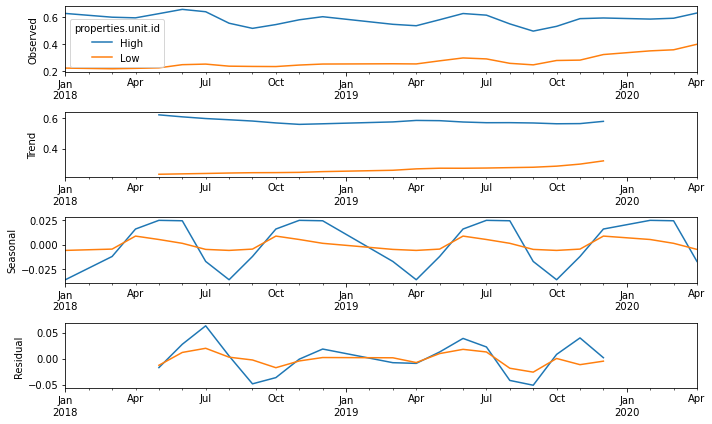

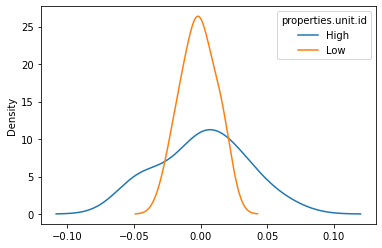

Residual autocorrelation High, Low


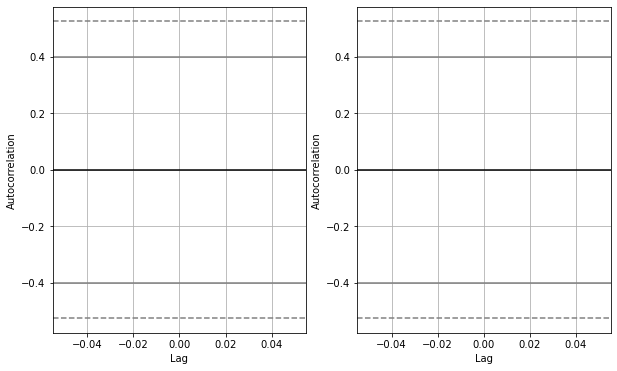

properties.unit.id,High,Low
count,18.000000,18.000000
mean,0.001268,-0.001594
std,0.031980,0.012863
min,-0.051231,-0.026058
25%,-0.015338,-0.010694
50%,0.003342,-0.001255
75%,0.021322,0.007888
max,0.062937,0.019767


In [8]:
#Group time series by month
df_monthly = df_time_series[["High", "Low"]].groupby(pd.PeriodIndex(df_time_series.index, freq='M'), axis=0).mean()
#Due to lack of months and difference of pattern, the analysis will start on 2018
df_monthly = df_monthly[df_monthly.index>"2017-12"]

#Analyze additive decomposition

decomposed_series = seasonal_decompose(df_monthly[["High", "Low"]], freq=6)

def plotseasonal(res, axes):
    res.observed.plot(ax=axes[0], legend=True)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')
    
fig, axes = plt.subplots(ncols=1, nrows=4, figsize=(10,6))

plotseasonal(decomposed_series, axes)

plt.tight_layout()
plt.savefig("outputs\\decomposition.png")
plt.show()
plt.close()

decomposed_series.resid.plot(kind='kde')
plt.savefig("outputs\\decomposition_residual_distribution.png")
plt.show()
plt.close()


fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10,6))

print("Residual autocorrelation High, Low")
pd.plotting.autocorrelation_plot(decomposed_series.resid["High"], axes[0])
pd.plotting.autocorrelation_plot(decomposed_series.resid["Low"], axes[1])
plt.show()

decomposed_series.resid.describe()

In [15]:
df_decomposed = decomposed_series.observed
df_decomposed.rename(columns = {"High" : "High_observed", "Low" : "Low_observed"}, inplace = True)
df_decomposed = pd.concat([df_decomposed, decomposed_series.trend], axis = 1)
df_decomposed.rename(columns = {"High" : "High_trend", "Low" : "Low_trend"}, inplace = True)
df_decomposed = pd.concat([df_decomposed, decomposed_series.seasonal], axis = 1)
df_decomposed.rename(columns = {"High" : "High_seasonal", "Low" : "Low_seasonal"}, inplace = True)
df_decomposed = pd.concat([df_decomposed, decomposed_series.resid], axis = 1)
df_decomposed.rename(columns = {"High" : "High_resid", "Low" : "Low_resid"}, inplace = True)

df_monthly = df_monthly.merge(df_decomposed, right_index = True, left_index = True)

# Conclusiones de decomposición

- Estadíos semestrales para ambos niveles de NDVI:

Encontramos que tomando una frecuencia de 6 meses la distribución del residual de ambas series se acerca a una distribución normal, lo que indica que un patrón semestral es el que más información nos da sobre las series de tiempo, lo cual no distancia del ciclo de siembra y cosecha de las paltas (se probaron otros niveles de frecuencia) y guarda relación con el gráfico de NDVI por mes del año.

- Tendencia positiva para NDVI bajo:

Podemos observar que la serie de NDVI bajo muestra una tendencia positiva de inicio a fin. Los cultivos de menor NDVI (y por ende menor producción en su mayoría) parecen estar mejorando en los últimos 2 años.

- El ruido no es completamente blanco:

Si bien la distribución residual se asemeja a una distribuación normal, no se muestra del todo claro. Es probable que haya factores externos que no se estén tomando en cuenta. Sin embargo, los residuos no muestran correlación.

- Diferencia de variabilidad marcada en la estacionalidad:

Se puede observar que la estacionalidad de la serie para NDVI altos muestra una variabilidad mayor a la serie para NDVI bajos. Esto refuerza los hallazgos relacionados a la desviación estándar del análisis de correlación.

# Moving average

In [10]:
df_monthly["High_moving_average"] = df_monthly["High"].rolling(window=6).mean()
df_monthly["Low_moving_average"] = df_monthly["Low"].rolling(window=6).mean()
df_monthly.index = df_monthly.index.to_timestamp()
df_monthly.to_excel("outputs\\df_monthly.xlsx")

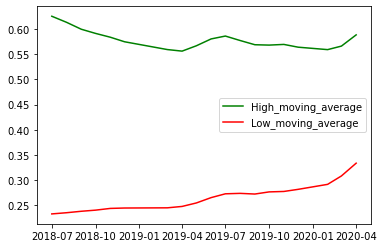

In [11]:
sns.lineplot(data = df_monthly["High_moving_average"], dashes = False, label = "High_moving_average", color = "green")
sns.lineplot(data = df_monthly["Low_moving_average"], dashes = False, label = "Low_moving_average", color = "red")

plt.savefig("outputs\\moving_average.png")

# Predict production
Fast try to predict the production level for a lot with NDVI_cols_2019_before_09 columns with a linear regression

In [12]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder, Normalizer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, r2_score

In [13]:
X = df[NDVI_cols_2019_before_09]
y = df["Kg/Ha"]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('outliers', RobustScaler()),
    ('normalizer', Normalizer())])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, NDVI_cols_2019_before_09)])
pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression(n_jobs=1, fit_intercept=True))
        ])
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=1)
print(f'Train datasets: X: {X_train.shape}, Y: {y_train.shape}')
print(f'Test datasets: X: {X_test.shape}, Y: {y_test.shape}')


LReg = pipe.fit(X_train, y_train)
LReg

Train datasets: X: (29, 21), Y: (29,)
Test datasets: X: (4, 21), Y: (4,)


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                               

In [14]:
y_train_pred = LReg.predict(X_train)
y_test_pred = LReg.predict(X_test)

print('TRAIN score: ', r2_score(y_train, y_train_pred))
print('TEST score: ', r2_score(y_test, y_test_pred))

print(y_test, pd.DataFrame(y_test_pred))

TRAIN score:  0.9390792961502161
TEST score:  -11.599992677912779
2     4658.420440
1     4037.375179
12    5492.066599
25     791.561625
Name: Kg/Ha, dtype: float64               0
0   7065.510845
1  13980.214620
2  -1613.507248
3  -1402.025151


El modelo muestra un nivel alto de overfitting, el nivel de NDVI en las fechas obtenidas y la cantidad de lotes no son suficientes para predecir el nivel de producción